In [34]:
import numpy as np
import yfinance as yf
import datetime
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

def download_preprocess(symbol="BTC-USD", start_date=datetime.datetime(2021, 1, 1), end_date=datetime.datetime(2023, 3, 20)):
    data = yf.download(symbol, start=start_date, end=end_date)
    data = data.iloc[::-1]
    data = data[['Close']]
    data['Prev_Close7'] = data['Close'].shift(7)
    data['Prev_Close6'] = data['Close'].shift(6)
    data['Prev_Close5'] = data['Close'].shift(5)
    data['Prev_Close4'] = data['Close'].shift(4)
    data['Prev_Close3'] = data['Close'].shift(3)
    data['Prev_Close2'] = data['Close'].shift(2)
    data['Prev_Close'] = data['Close'].shift(1)
    data.dropna(inplace=True)
    y = data['Close']
    X = data.drop('Close', axis=1)

    return X, y, data


start = datetime.datetime(2021, 2, 1)
end = datetime.datetime(2023, 3, 20)
X, y, data = download_preprocess(symbol="BTC-USD", start_date=start, end_date=end)

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

# mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
mape = mean_absolute_percentage_error(y, y_pred)
print(f'MAE: {mae}')
print(f'MAPE: {mape}')
# print(f'y_pred: {y_pred}')


[*********************100%***********************]  1 of 1 completed
MAE: 963.791739751552
MAPE: 0.02556153100210008
y_pred: [24184.10233556 22307.27490161 20725.03872466 20185.2421361
 20324.88409423 21678.34697324 22273.52503548 22561.52488123
 22596.90312276 22487.54642825 22482.61682178 23527.32073164
 23742.73417282 23300.88368764 23636.16417638 23646.15196747
 23290.2801249  23295.81513065 23988.57520949 24265.81325872
 24541.05211969 24930.47360714 24457.3860971  24738.44687903
 24653.46254239 23743.012722   24363.05267632 22358.50536446
 21887.48438244 21818.88522439 21866.27533818 21739.18313306
 21883.20812483 22981.71461951 23356.13551282 22924.41136955
 23084.34914323 23410.65619878 23542.84143777 23583.26980742
 23814.91879479 23263.76373376 22950.38918936 23810.71161842
 23130.77282314 23181.84931015 23122.31984868 23181.10012954
 22754.76774627 23001.28481227 22809.62978931 22858.74462041
 22774.52106005 21235.98355212 20786.12021912 21173.16553545
 21204.54972558 20988.

In [45]:
start = datetime.datetime(2021, 3, 10)
end = datetime.datetime(2023, 3, 21)
Xt, yt, data = download_preprocess(symbol="BTC-USD", start_date=start, end_date=end)

prediction = model.predict(np.array(Xt))
print(f'Prediction BTC/USD: {prediction[0]}')

[*********************100%***********************]  1 of 1 completed
Prediction BTC/USD: 24725.421727167377


/Users/kkepins-macwro_1/.local/share/virtualenvs/ml-IYlnPhoE/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [46]:
yt

Date
2023-03-13    24197.533203
2023-03-12    22163.949219
2023-03-11    20632.410156
2023-03-10    20187.244141
2023-03-09    20363.021484
                  ...     
2021-03-14    59302.316406
2021-03-13    61243.085938
2021-03-12    57332.089844
2021-03-11    57805.121094
2021-03-10    56008.550781
Name: Close, Length: 734, dtype: float64

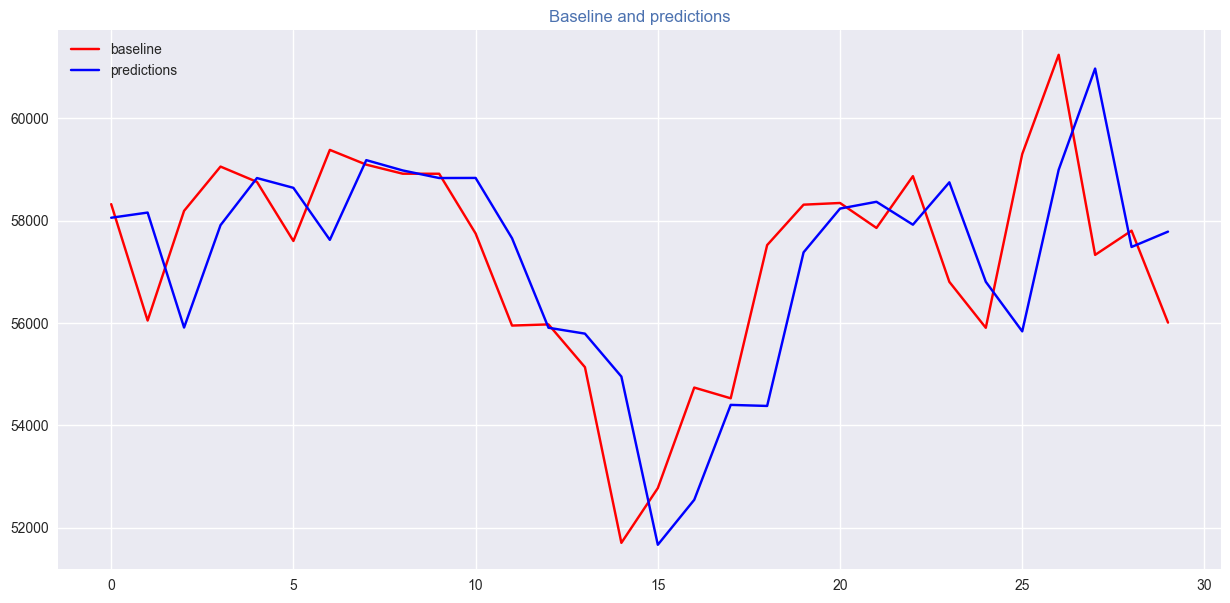

In [47]:

from dslibs.simpleplotter import plot_keras_model_history

start_here = len(yt) - 30
plot_keras_model_history(yt[start_here:], prediction[start_here:], "baseline", "predictions")
